In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from python_speech_features import mfcc

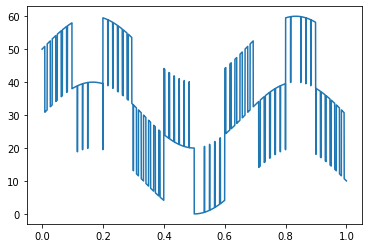

In [2]:
t = np.linspace(0, 1, 5000, endpoint=False)

# Generate our variable time step durations (dt-s) by combining sine, square and pwm waves
sq = signal.square(2 * np.pi * 5 * t)  # square wave
sig = np.sin(3 * np.pi * t)  # sine wave
pwm = signal.square(4 * np.pi * 30 * t, duty=(sig + 1)/2)  # pwm wave
ts = 10*(pwm+sig+sq)  # amplify
ts -= np.min(ts)  # move to positive range
plt.figure()
plt.plot(t, ts)

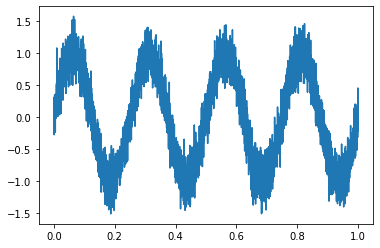

In [3]:
# Our actual signal values will be the sum of sine wave and gaussian noise
sig2 = np.sin(8 * np.pi * t)
noise = np.random.normal(0,0.2,sig2.shape[0])
input_signal = sig2+noise
plt.figure()
plt.plot(t, input_signal)

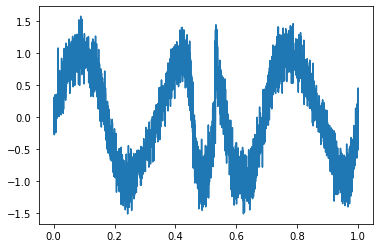

In [4]:
# Plot the signal as a function of time determined by our dt-s
plt.figure()
irregular_t = np.cumsum(ts)
irregular_t /= np.max(irregular_t)
plt.plot(irregular_t, input_signal)

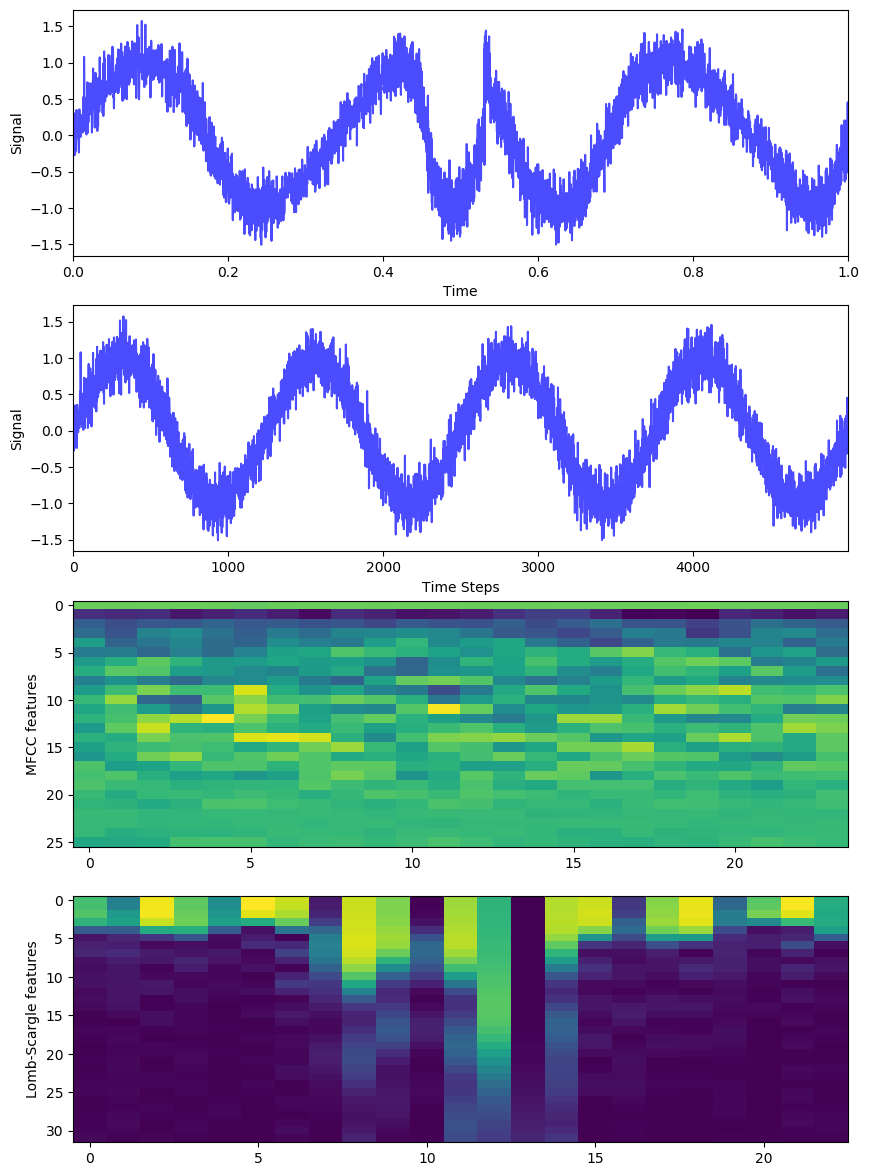

In [6]:
fig, ax_list = plt.subplots(nrows=4, figsize=(10, 15), gridspec_kw={'wspace': 0, 'hspace': 0.2}, dpi=100)

# Plot input signal over time
ax = ax_list[0]
data = input_signal
presentation_steps = irregular_t
line_target, = ax.plot(presentation_steps, data, color='blue', alpha=0.7)
ax.set_ylabel("Signal")
ax.set_xlabel("Time")
ax.set_xlim((0, presentation_steps[-1]))

# Plot input signal over time steps
ax = ax_list[1]
data = input_signal
presentation_steps = np.arange(data.shape[0])
line_target, = ax.plot(presentation_steps, data, color='blue', alpha=0.7)
ax.set_ylabel("Signal")
ax.set_xlabel("Time Steps")
ax.set_xlim((0, presentation_steps[-1]))


window = 400
step = 200

# Pot MFCC spectrogram of input signal
ax = ax_list[2]
def convert_to_mfccs(wav):
    return mfcc(wav, 1, winstep=step, winlen=window, numcep=32)
data = convert_to_mfccs(input_signal)
presentation_steps = np.arange(data.shape[0])
ax.imshow(data.T, aspect="auto", interpolation="nearest")
ax.set_ylabel("MFCC features")

# Plot Lomb-Scargle spectrogram of input signal
idx = 3
ax = ax_list[idx]
n_steps = (irregular_t.shape[0] - window) // step
fmin = 1  # smallest frequency in spectrogram channels
fmax = 500  # largest frequency in spectrogram channels
f = np.linspace(fmin, fmax, 32)
powers = []
# Comput LS spectrogram on sliding window (bin) over input signal
for step_idx in range(n_steps):
    x = irregular_t[step_idx*step:(step_idx*step)+window]
    y = input_signal[step_idx*step:(step_idx*step)+window]
    pgram = signal.lombscargle(x, y - np.mean(y), f, normalize=True)
    powers.append(pgram)
ax.imshow(np.array(powers).T, aspect="auto", interpolation="nearest")
ax.set_ylabel("Lomb-Scargle features")
    
plt.show()